In [31]:
import pandas as pd
import os

folder = 'dataset_FE'
filename = 'datos_procesados.csv'
file_path = os.path.join(folder, filename)

try:
    df = pd.read_csv(
        file_path,
        sep=',',
        decimal='.'
    )
    
    print(f"✅ DataFrame cargado exitosamente desde: {file_path}")
    print(f"Dimensiones: {df.shape}")
    print("\nPrimeras 5 filas:")
    print(df.head())

except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo en la ruta: {file_path}")
except Exception as e:
    print(f"❌ Error al leer el archivo: {e}")

✅ DataFrame cargado exitosamente desde: dataset_FE\datos_procesados.csv
Dimensiones: (1185, 37)

Primeras 5 filas:
          DIA  EE Planta / Hl  EE Elaboracion / Hl  EE Bodega / Hl  \
0  2020-07-01      642.727209            47.145349       69.023256   
1  2020-07-02        7.767254             0.769609        0.798838   
2  2020-07-03        8.801205             0.862593        0.835762   
3  2020-07-04        5.175639             0.439225        0.371077   
4  2020-07-05        7.924665             0.802365        0.717787   

   EE Cocina / Hl  EE Agua / Hl  ET Planta / Hl  ET Elab/Hl  ET Bodega/Hl  \
0        0.000000      4.372093     3506.412338  924.646747    146.731163   
1        0.319229     -0.023412       67.023237   17.419777      2.050417   
2        0.260924      0.126352       73.462669   20.504276      1.970632   
3        0.258048      0.077983       49.022234   17.832753      1.275730   
4        0.301592      0.114267       62.150576   25.156634      1.363221   

 

In [32]:
df.shape

(1185, 37)

In [56]:
df.columns

Index(['DIA', 'EE Planta / Hl', 'EE Elaboracion / Hl', 'EE Bodega / Hl',
       'EE Cocina / Hl', 'EE Agua / Hl', 'ET Planta / Hl', 'ET Elab/Hl',
       'ET Bodega/Hl', 'ET Cocina/Hl', 'ET Envasado/Hl', 'Hl de Mosto',
       'Cocimientos Diarios', 'Planta (Kw)', 'Bodega (Kw)', 'Calderas (Kw)',
       'Efluentes (Kw)', 'Frio (Kw)', 'Prod Agua (Kw)', 'KW CO2',
       'KW Enfluente Efl', 'KW Enfluentes Hidr', 'Kw Compresores Aire',
       'Produccion (Hl)', 'Temp Tq Intermedio', 'Gas Planta (Mj)',
       'ET Envasado (Mj)', 'ET Servicios (Mj)', 'Tot L3. L4 y Planta de CO2',
       'Tot A40/240/50/60/Centec/Filtro', 'Tot  A130/330/430', 'Tot  Trasiego',
       'anio', 'mes', 'dia', 'temp_promedio_dia', 'estacion'],
      dtype='object')

# EDA
Vamos a comenzar analizando nuestra variable objetivo Frio(Kw). 

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Vamos a hacer una eliminación de outliers con IQR solamente para hacer el analisis exploratorio ya que hay demasiados outliers que nos impiden visualizar los patrones.

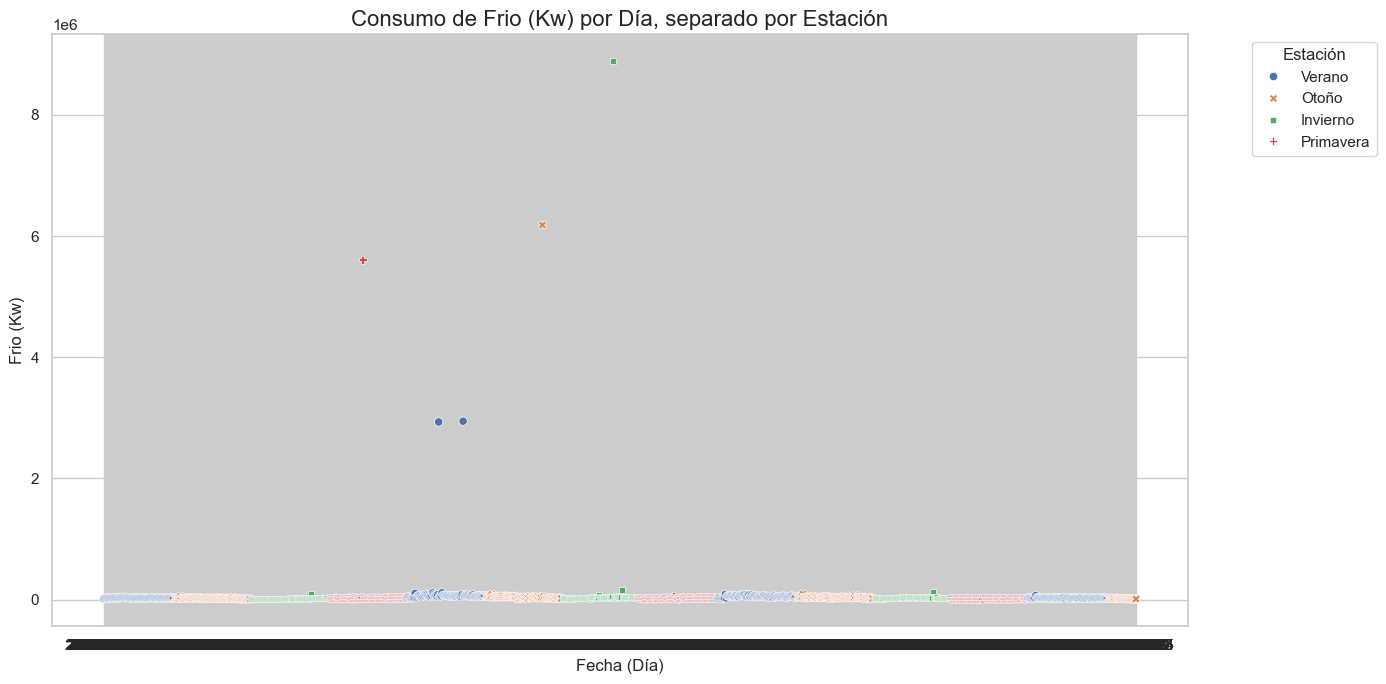

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

sns.scatterplot(
    data=df,
    x='DIA',
    y='Frio (Kw)',
    hue='estacion',
    style='estacion',  
    markers=True,      
)

# 4. Añadir títulos y etiquetas
plt.title('Consumo de Frio (Kw) por Día, separado por Estación', fontsize=16)
plt.xlabel('Fecha (Día)', fontsize=12)
plt.ylabel('Frio (Kw)', fontsize=12)

# 5. Mover la leyenda fuera del gráfico
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [35]:
def limpiar_outliers_iqr(df, columnas_a_limpiar, k=1.5):
    df_limpio = df.copy()
    
    print("Iniciando limpieza de outliers...")
    
    for columna in columnas_a_limpiar:
        if columna not in df_limpio.columns:
            continue
            
        if not pd.api.types.is_numeric_dtype(df_limpio[columna]):
            continue

        
        Q1 = df_limpio[columna].quantile(0.25)
        Q3 = df_limpio[columna].quantile(0.75)
        IQR = Q3 - Q1
        
        limite_inferior = Q1 - (k * IQR)
        limite_superior = Q3 + (k * IQR)
        
        outliers_antes = df_limpio[
            (df_limpio[columna] < limite_inferior) | 
            (df_limpio[columna] > limite_superior)
        ].shape[0]
        
        if outliers_antes > 0:
            
            df_limpio.loc[
                (df_limpio[columna] < limite_inferior) | 
                (df_limpio[columna] > limite_superior), 
                columna
            ] = np.nan


    print("Limpieza completada.")
    return df_limpio

In [36]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
df_limpio = limpiar_outliers_iqr(df, columnas_numericas)


Iniciando limpieza de outliers...
Limpieza completada.


# Analisis bivariado
Vamos a analizar:
- Consumo de frio (kw) con estacion
- Hl de Mosto  con estacion
- Produccion (Hl) de Agua

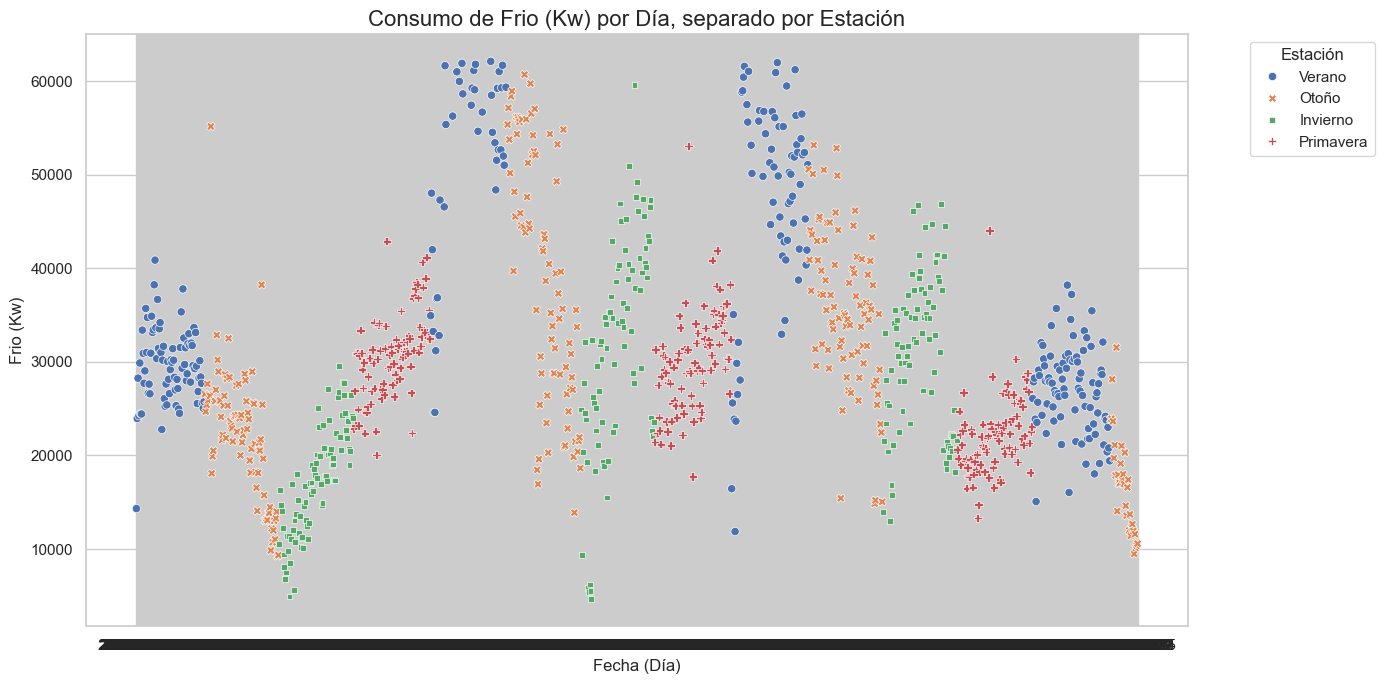

In [63]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

sns.scatterplot(
    data=df_limpio,
    x='DIA',
    y='Frio (Kw)',
    hue='estacion',
    style='estacion',  
    markers=True,      
)

plt.title('Consumo de Frio (Kw) por Día, separado por Estación', fontsize=16)
plt.xlabel('Fecha (Día)', fontsize=12)
plt.ylabel('Frio (Kw)', fontsize=12)

plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Podemos ver que se nota una especie de patron periodico respecto a las estaciones, por ejemplo:
- crecimiento constante en invierno, primavera y verano
- decrecimiento en otoño

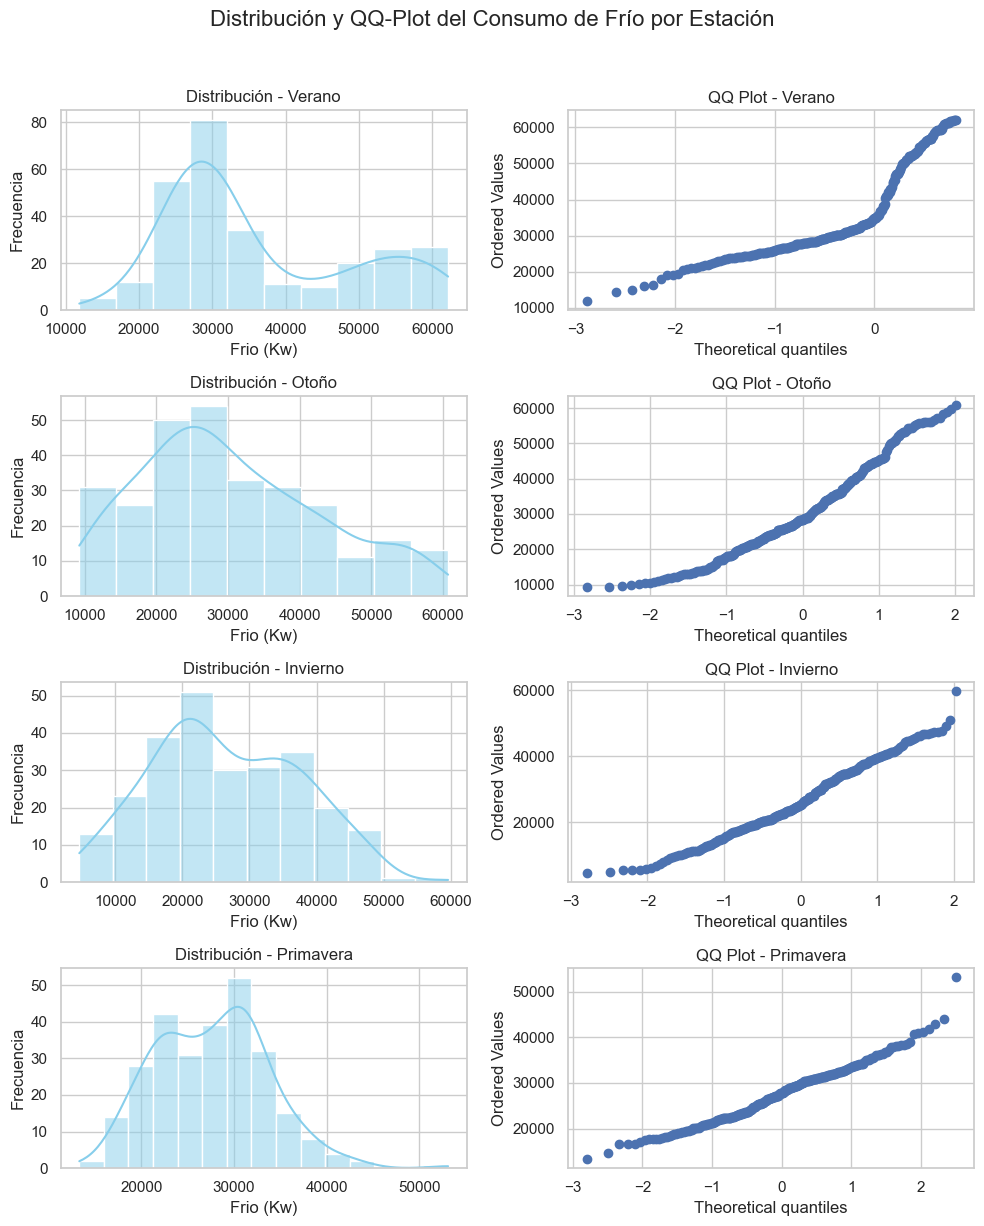

In [41]:
import scipy.stats as stats
sns.set(style="whitegrid")
estaciones = df_limpio["estacion"].unique()

fig, axes = plt.subplots(nrows=len(estaciones), ncols=2, figsize=(10, 12))
fig.suptitle("Distribución y QQ-Plot del Consumo de Frío por Estación", fontsize=16, y=1.02)

for i, estacion in enumerate(estaciones):
    datos = df_limpio[df_limpio["estacion"] == estacion]["Frio (Kw)"]
    
    # --- Gráfico de distribución ---
    sns.histplot(datos, kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Distribución - {estacion}")
    axes[i, 0].set_xlabel("Frio (Kw)")
    axes[i, 0].set_ylabel("Frecuencia")

    # --- QQ Plot ---
    stats.probplot(datos, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"QQ Plot - {estacion}")

plt.tight_layout()
plt.show()

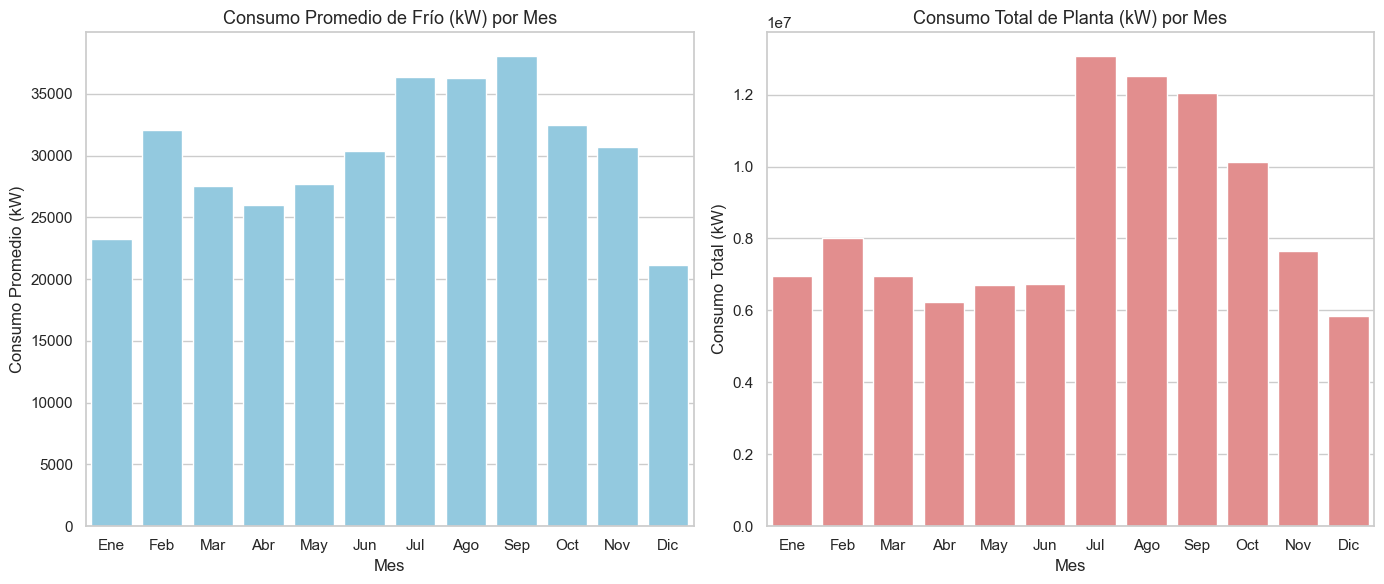

In [84]:
sns.set(style="whitegrid", palette="deep")

# --- Calcular consumo promedio mensual de frío ---
consumo_mensual = (
    df_limpio.groupby("mes")["Frio (Kw)"]
    .mean()
    .reset_index()
    .sort_values("mes")
)

# --- Calcular consumo total mensual de Planta ---
planta_mensual = (
    df_limpio.groupby("mes")["Planta (Kw)"]
    .sum()
    .reset_index()
    .sort_values("mes")
)

# --- Crear figura con dos gráficos ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# === Gráfico 1: Consumo Promedio de Frío ===
sns.barplot(data=consumo_mensual, x="mes", y="Frio (Kw)", color="skyblue", ax=axes[0])
axes[0].set_title("Consumo Promedio de Frío (kW) por Mes", fontsize=13)
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Consumo Promedio (kW)")
axes[0].set_xticks(range(0, 12))
axes[0].set_xticklabels(
    ["Ene", "Feb", "Mar", "Abr", "May", "Jun",
     "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
)

# === Gráfico 2: Consumo Total de Planta ===
sns.barplot(data=planta_mensual, x="mes", y="Planta (Kw)", color="lightcoral", ax=axes[1])
axes[1].set_title("Consumo Total de Planta (kW) por Mes", fontsize=13)
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("Consumo Total (kW)")
axes[1].set_xticks(range(0, 12))
axes[1].set_xticklabels(
    ["Ene", "Feb", "Mar", "Abr", "May", "Jun",
     "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
)

plt.tight_layout()
plt.show()

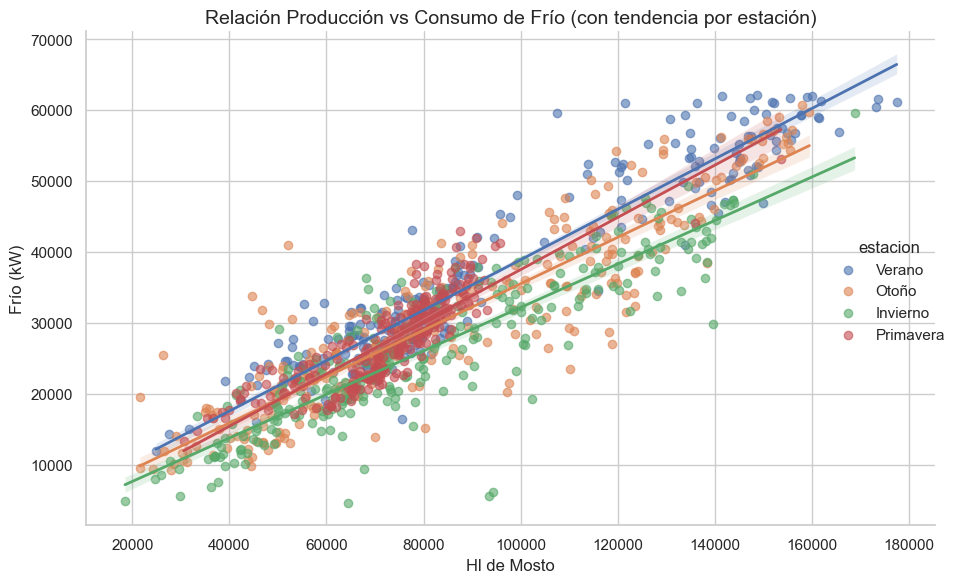

In [86]:
sns.set(style="whitegrid")

sns.lmplot(
    data=df_limpio,
    x="Planta (Kw)",
    y="Frio (Kw)",
    hue="estacion",
    height=6,
    aspect=1.4,
    scatter_kws={"alpha": 0.6},  
    line_kws={"lw": 2},          
)

plt.title("Relación Producción vs Consumo de Frío (con tendencia por estación)", fontsize=14)
plt.xlabel("Hl de Mosto")
plt.ylabel("Frío (kW)")
plt.tight_layout()
plt.show()


## Frio (Kw) vs Hl de mosto

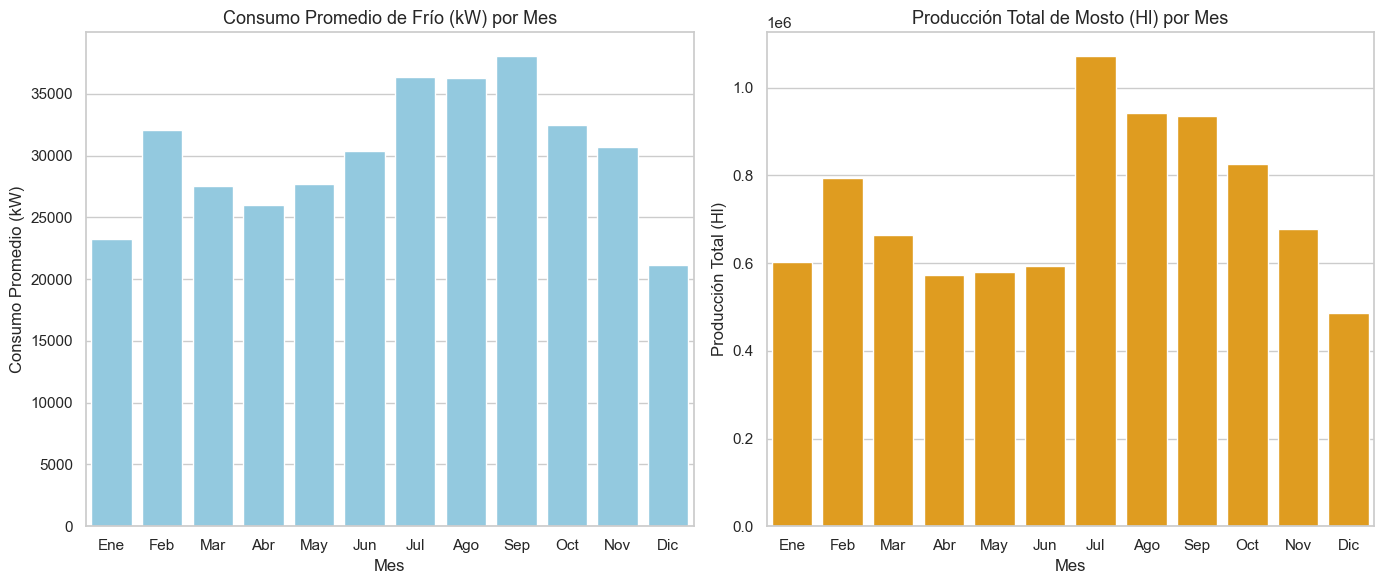

In [51]:
sns.set(style="whitegrid", palette="deep")

# --- Calcular consumo promedio mensual ---
consumo_mensual = (
    df_limpio.groupby("mes")["Frio (Kw)"]
    .mean()
    .reset_index()
    .sort_values("mes")
)

# --- Calcular producción total mensual ---
produccion_mensual = (
    df_limpio.groupby("mes")["Hl de Mosto"]
    .sum()
    .reset_index()
    .sort_values("mes")
)

# --- Crear figura con dos gráficos ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# === Gráfico 1: Consumo Promedio de Frío ===
sns.barplot(data=consumo_mensual, x="mes", y="Frio (Kw)", color="skyblue", ax=axes[0])
axes[0].set_title("Consumo Promedio de Frío (kW) por Mes", fontsize=13)
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Consumo Promedio (kW)")
axes[0].set_xticks(range(0, 12))
axes[0].set_xticklabels(
    ["Ene", "Feb", "Mar", "Abr", "May", "Jun",
     "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
)

# === Gráfico 2: Producción Total de Mosto ===
sns.barplot(data=produccion_mensual, x="mes", y="Hl de Mosto", color="orange", ax=axes[1])
axes[1].set_title("Producción Total de Mosto (Hl) por Mes", fontsize=13)
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("Producción Total (Hl)")
axes[1].set_xticks(range(0, 12))
axes[1].set_xticklabels(
    ["Ene", "Feb", "Mar", "Abr", "May", "Jun",
     "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
)

plt.tight_layout()
plt.show()


Se consume mas en julio agosto septiembre que son fines de verano principios de otoño. 
En julio se prepara la la mayor cantidad porque viene el periodo donde mas se consume.

A continuación vemos si hay alguna correlacion (spearman) entre la produccion de hl de mosto y el consumo de frio

No vemos una clara correlacion aunque puede deberse a los valores 0 de hl mosto

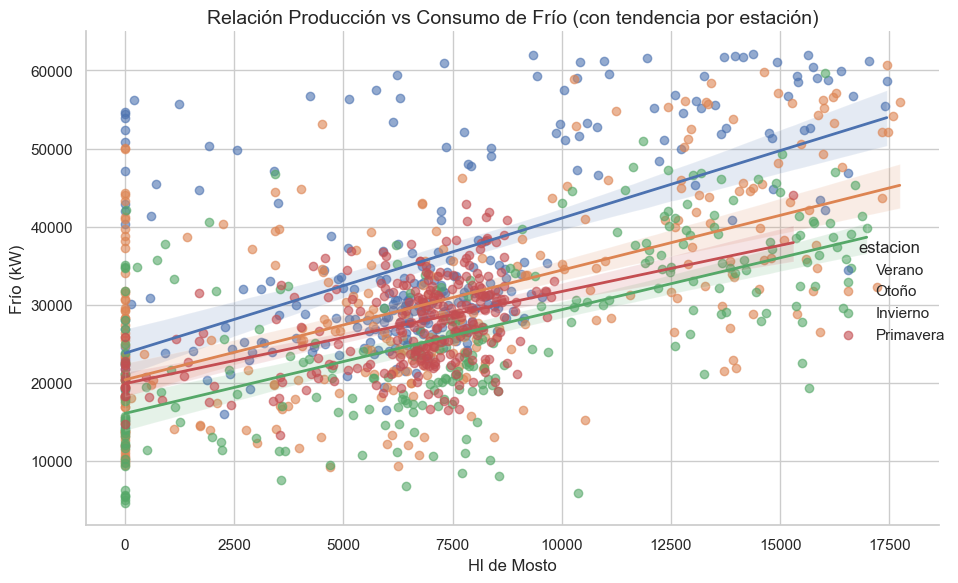

In [ ]:
sns.set(style="whitegrid")

sns.lmplot(
    data=df_limpio,
    x="Hl de Mosto",
    y="Frio (Kw)",
    hue="estacion",
    height=6,
    aspect=1.4,
    scatter_kws={"alpha": 0.6},  
    line_kws={"lw": 2},          
)

plt.title("Relación Producción vs Consumo de Frío (con tendencia por estación)", fontsize=14)
plt.xlabel("Hl de Mosto")
plt.ylabel("Frío (kW)")
plt.tight_layout()
plt.show()


Podemos apreciar acá que segun estación, se consume mas frio en verano por Hl de mosto que con las otras estaciones.

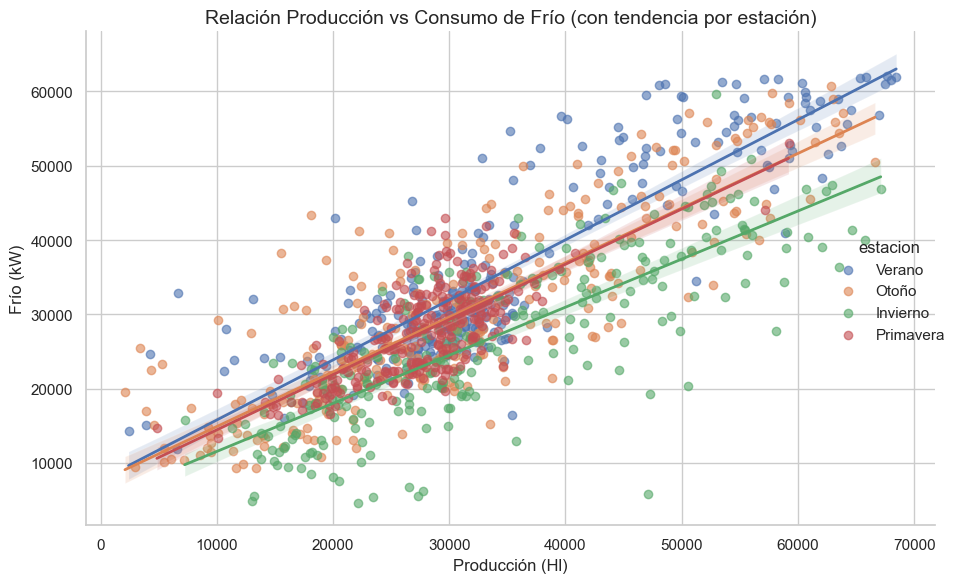

In [54]:
sns.set(style="whitegrid")

sns.lmplot(
    data=df_limpio,
    x="Produccion (Hl)",
    y="Frio (Kw)",
    hue="estacion",
    height=6,
    aspect=1.4,
    scatter_kws={"alpha": 0.6},  # transparencia en los puntos
    line_kws={"lw": 2},          # grosor de las líneas
)

plt.title("Relación Producción vs Consumo de Frío (con tendencia por estación)", fontsize=14)
plt.xlabel("Producción (Hl)")
plt.ylabel("Frío (kW)")
plt.tight_layout()
plt.show()


# analisis de correlacíon

In [ ]:
target = "Frio (Kw)"  # 🔹 Cambia aquí tu variable objetivo

corr_spearman = df_limpio.corr(method="spearman", numeric_only=True)

corr_target = corr_spearman[target].drop(target).sort_values(ascending=False)


corr_filtrada = corr_target[abs(corr_target) > 0.70]


print(f"🔹 Correlaciones de Spearman con el target '{target}' (|ρ| > 0.70):")
print(corr_filtrada.to_frame(name="Spearman"))


🔹 Correlaciones de Spearman con el target 'Frio (Kw)' (|ρ| > 0.70):
                     Spearman
Planta (Kw)          0.881309
Produccion (Hl)      0.780565
Bodega (Kw)          0.759701
Kw Compresores Aire  0.744094


Podemos observar que las principales correlaciones son las que ya vimos anteriormente

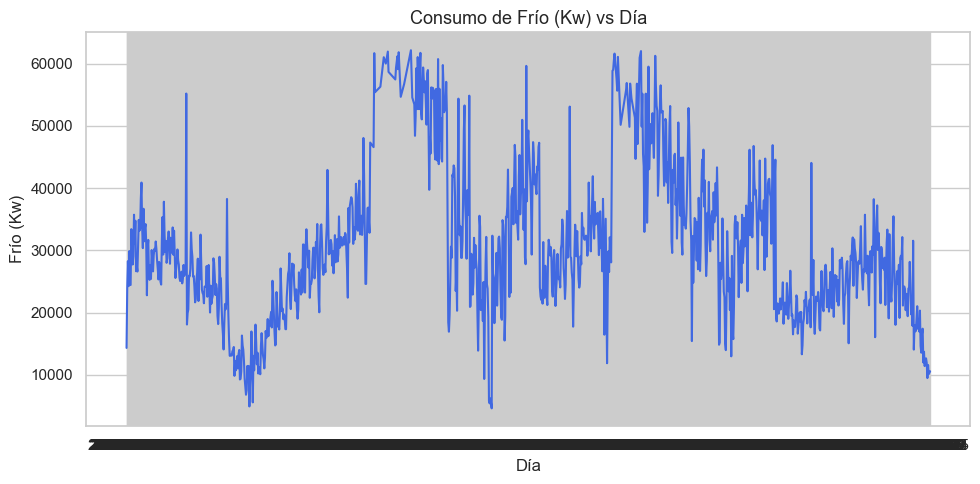

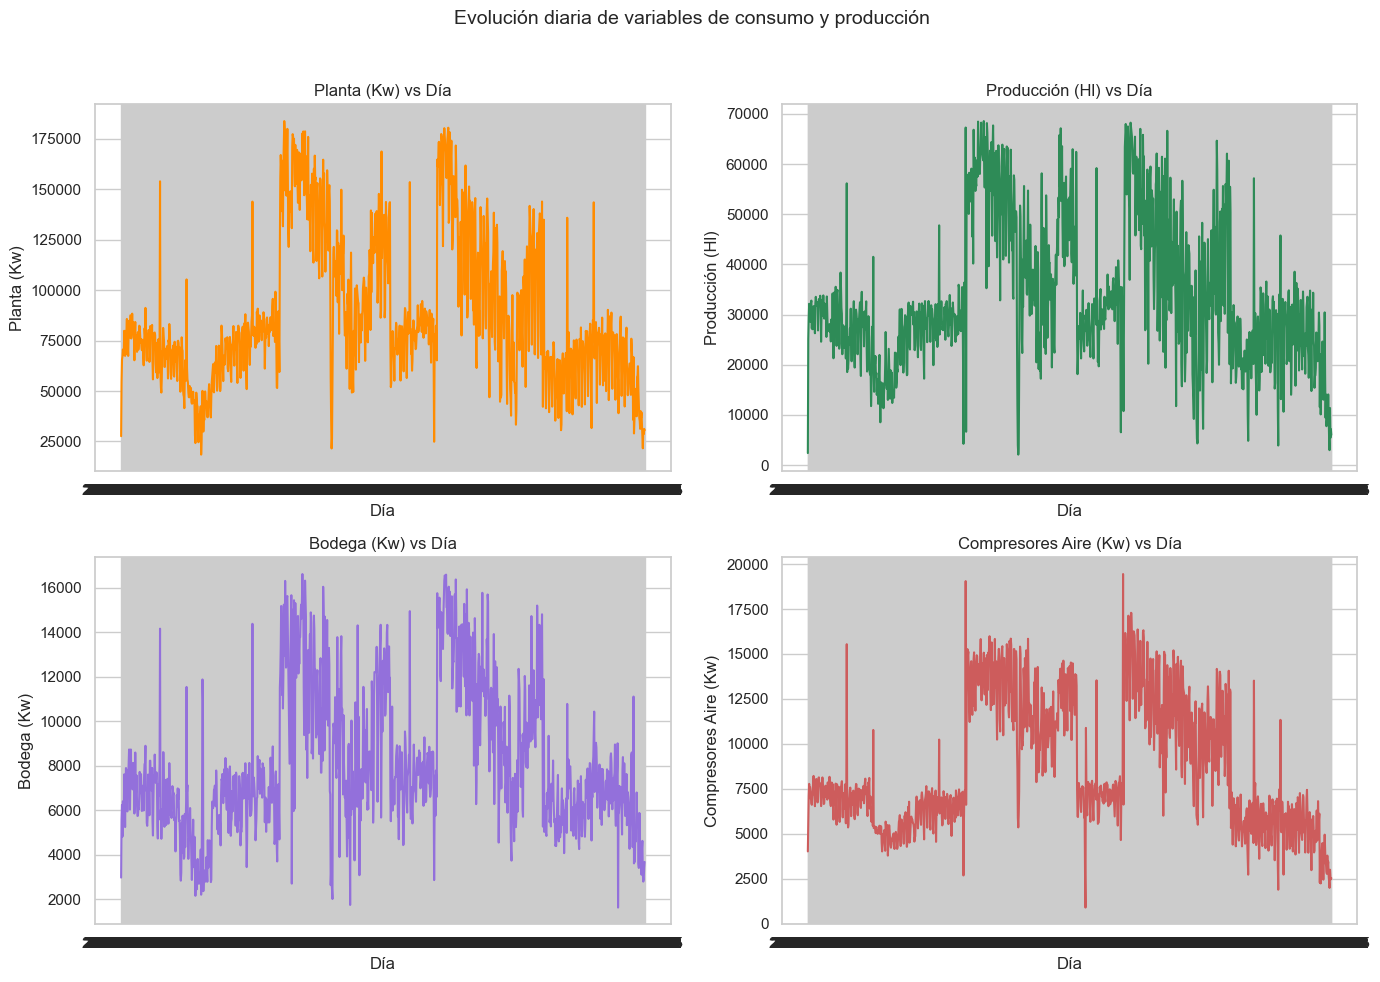

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# --- Configuración general ---
sns.set(style="whitegrid", palette="deep")

# ============================
# 🔹 Gráfico del TARGET vs Día
# ============================
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_limpio, x="DIA", y="Frio (Kw)", color="royalblue")
plt.title("Consumo de Frío (Kw) vs Día", fontsize=13)
plt.xlabel("Día")
plt.ylabel("Frío (Kw)")
plt.tight_layout()
plt.show()

# ==============================
# 🔹 Matriz 2x2 de otras variables
# ==============================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Evolución diaria de variables de consumo y producción", fontsize=14)

# --- Gráfico 1: Planta (Kw) ---
sns.lineplot(data=df_limpio, x="DIA", y="Planta (Kw)", ax=axes[0, 0], color="darkorange")
axes[0, 0].set_title("Planta (Kw) vs Día")
axes[0, 0].set_xlabel("Día")
axes[0, 0].set_ylabel("Planta (Kw)")

# --- Gráfico 2: Producción (Hl) ---
sns.lineplot(data=df_limpio, x="DIA", y="Produccion (Hl)", ax=axes[0, 1], color="seagreen")
axes[0, 1].set_title("Producción (Hl) vs Día")
axes[0, 1].set_xlabel("Día")
axes[0, 1].set_ylabel("Producción (Hl)")

# --- Gráfico 3: Bodega (Kw) ---
sns.lineplot(data=df_limpio, x="DIA", y="Bodega (Kw)", ax=axes[1, 0], color="mediumpurple")
axes[1, 0].set_title("Bodega (Kw) vs Día")
axes[1, 0].set_xlabel("Día")
axes[1, 0].set_ylabel("Bodega (Kw)")

# --- Gráfico 4: Compresores Aire (Kw) ---
sns.lineplot(data=df_limpio, x="DIA", y="Kw Compresores Aire", ax=axes[1, 1], color="indianred")
axes[1, 1].set_title("Compresores Aire (Kw) vs Día")
axes[1, 1].set_xlabel("Día")
axes[1, 1].set_ylabel("Compresores Aire (Kw)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
